In [311]:
import numpy as np
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.colors import LinearSegmentedColormap

W = LinearSegmentedColormap.from_list('w', ["w", "w"], N=256)

In [189]:
#Starting State = (1/0)
#Terminal State = (2,3)

Move_Reward = -1
Final_Reward = 10

ACTIONS = {
    0: [1, 0],   # north
    1: [-1, 0],  # south
    2: [0, -1],  # west
    3: [0, 1],   # east
}
discount = 1

In [330]:
class GridWorld:
    
    def __init__(self,size = 4,iters= 1):
        
        self.Q = defaultdict(lambda: np.zeros(4))
        self.size = size
        self.iters = iters
        self.eps = 1
        self.eps_decay = 0.9999997
        self.eps_min = 0.05
        self.N = defaultdict(lambda: np.zeros(4))
        self.Returns = defaultdict(lambda: np.zeros(4))
    
    #Get Starting State
    def reset(self):
        state = (1,0)
        return state
        
    #Perform Action
    def step(self,state,action):
        
        done = False
        
        if state == (self.size-2,self.size-1):
            reward = Final_Reward
            done = True
            return state,reward,done
        s_1 = (state[0]+action[0],state[1]+action[1])
        reward = Move_Reward
        
        if s_1[0]<0 or s_1[0]>=(self.size):
            s_1 = state
            
        if s_1[1]<0 or s_1[1]>=(self.size):
            s_1 = state
            
        return s_1,reward,done
    
    #Get the probablity of every action/ Depends upon the value epsilon which decays through time
    def get_action_prob(self,Q_S):
        
        action_probs = np.ones(len(ACTIONS))*(self.eps/len(ACTIONS))
        best_action = np.argmax(Q_S)
        action_probs[best_action] = (1-self.eps) + self.eps/len(ACTIONS)
        return action_probs
        
    #Select the best action
    def best_policy(self):
        
        return dict((state,np.argmax(action))for state,action in self.Q.items())
    
    #Generate random episdoe for the agent to learn upon
    def get_episode(self):
        
        trajectory = []
        
        state = self.reset()
        
        while True:
            #Getting the action
            action_probs = self.get_action_prob(self.Q[state])
            action_to_select = np.random.choice(np.arange(len(ACTIONS)),p = action_probs) if state in self.Q else np.random.randint(0,4) 
            action = ACTIONS.get(action_to_select)
            
            next_state,reward,done = self.step(state,action)
            trajectory.append((state,action,reward))
            state = next_state
            
            if done:
                break
                
        return trajectory 
    
    #Update the state_action_values 
    def update_Q(self):
        
        tra = self.get_episode()
        states,actions,rewards = zip(*tra)
        #print(tra)
        
        for i,state in enumerate(states):
            
            if actions[i] == [1, 0]:
                a = 0
            elif actions[i] == [-1,0]:
                a = 1
            elif actions[i] == [0,-1]:
                a = 2
            elif actions[i] == [0,1]:
                a = 3
            
            self.N[state][a] += 1
            alpha = 1/self.N[state][a]
            self.Q[state][a] += alpha*(sum(rewards[i:])-self.Q[state][a])
        
        return self.Q
    
    #Main Loop calling update_Q and decaying Epsilon 
    def Monte_Carlo_On_Policy(self):
        
        for i in range(self.iters):
            
            if i % 5 == 0:
                print("In Loop {:.5f}".format(i), end="\r")
            
            self.eps = max(self.eps_min,self.eps_decay*self.eps)

            self.Q = self.update_Q()
            
        policy = self.best_policy()
        
        return self.Q,policy
        
    #Selecting the best_value function
    def best_value(self):
        
        return dict((state,np.max(action))for state,action in self.Q.items())
    
    def render(self,values_matrix, title=None):

        size = len(values_matrix) if len(values_matrix) < 20 else 20
        fig, ax = plt.subplots(figsize=(size, size))
        if title is not None:ax.set_title(title)
        ax.grid(which='major', axis='both',linestyle='-', color='k', linewidth=2)
        sn.heatmap(values_matrix, annot=True, fmt=".1f", cmap=W,linewidths=1, linecolor="black", cbar=False)
        plt.show()
        return fig, ax
            

In [347]:
iters = 200000
env = GridWorld(4,iters)

Q,policy = env.Monte_Carlo_On_Policy()

In [348]:
value = env.best_value() 

In [349]:
policy

{(1, 0): 3,
 (1, 1): 3,
 (2, 0): 3,
 (3, 0): 3,
 (2, 1): 3,
 (3, 1): 3,
 (3, 2): 3,
 (2, 2): 3,
 (1, 2): 3,
 (1, 3): 0,
 (0, 2): 3,
 (0, 1): 3,
 (0, 0): 3,
 (2, 3): 0,
 (0, 3): 0,
 (3, 3): 1}

In [350]:
Q

defaultdict(<function __main__.GridWorld.__init__.<locals>.<lambda>()>,
            {(1,
              0): array([-24.55130769, -27.07305062, -25.94546593, -22.24139123]),
             (1,
              1): array([-20.02071841, -24.26058341, -25.81634853, -15.95148157]),
             (2,
              0): array([-24.23455614, -26.10096866, -24.66540363, -20.02264977]),
             (3,
              0): array([-24.26313358, -24.76086194, -24.28828868, -19.92004444]),
             (2,
              1): array([-19.8247978 , -22.49612165, -24.75790919, -10.18376658]),
             (3,
              1): array([-19.87705918, -20.29296937, -24.05353454, -11.95566274]),
             (3,
              2): array([-12.14942076, -10.38361251, -19.66591027,  -3.08451284]),
             (2,
              2): array([-12.07459899, -16.07654911, -19.9338753 ,   9.        ]),
             (1,
              2): array([-10.21399539, -19.99509272, -22.24537578,  -8.31878336]),
             (1,
           

In [351]:
#Fitting all the values into numpy array to render
values_matrix = np.zeros((env.size,env.size))
for x in value:
    values_matrix[x] = value[x]

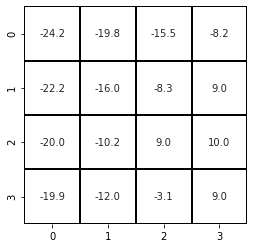

(<Figure size 288x288 with 1 Axes>, <AxesSubplot:>)

In [352]:
env.render(values_matrix)